In [3]:
#data loading
import pandas as pd
filename="/content/HealthInsurance.csv"
a=pd.read_csv(str(filename))

print(a)

      rownames health  age limit  gender insurance married selfemp  family  \
0            1    yes   31    no    male       yes     yes     yes       4   
1            2    yes   31    no  female       yes     yes      no       4   
2            3    yes   54    no    male       yes     yes      no       5   
3            4    yes   27    no    male       yes      no      no       5   
4            5    yes   39    no    male       yes     yes      no       5   
...        ...    ...  ...   ...     ...       ...     ...     ...     ...   
8797      8798    yes   46    no  female       yes     yes      no       3   
8798      8799    yes   50    no    male       yes     yes      no       3   
8799      8800    yes   27    no    male       yes     yes      no       2   
8800      8801    yes   27    no  female       yes     yes      no       2   
8801      8802    yes   35    no    male       yes     yes      no       4   

         region ethnicity   education  
0         south      ca

In [4]:
##Checking for null values
a.isna().sum()

,0
rownames,0
health,0
age,0
limit,0
gender,0
insurance,0
married,0
selfemp,0
family,0
region,0


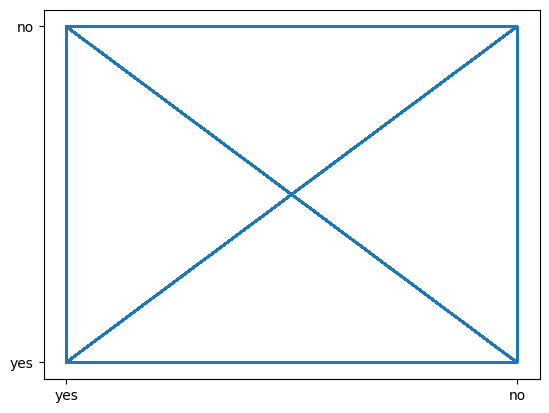

In [6]:
from matplotlib import pyplot as plt
target="insurance"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 8802 artists>

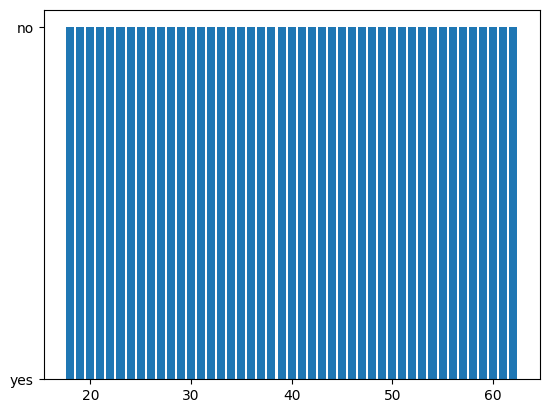

In [7]:
plt.bar(a[a.columns[2]],a[str(target)])

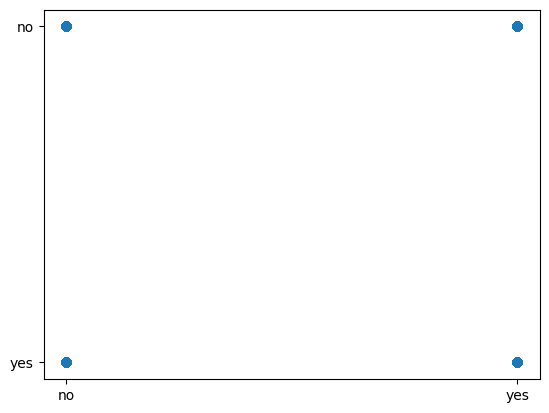

In [8]:
plt.scatter(a[a.columns[3]], a[str(target)])

In [12]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()


#transform string into int
transformColumns={3,4,5,6,7,10,11}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

      rownames  health  age  limit  gender  insurance  married  selfemp  \
0            1       1   31      0       1          1        1        1   
1            2       1   31      0       0          1        1        0   
2            3       1   54      0       1          1        1        0   
3            4       1   27      0       1          1        0        0   
4            5       1   39      0       1          1        1        0   
...        ...     ...  ...    ...     ...        ...      ...      ...   
8797      8798       1   46      0       0          1        1        0   
8798      8799       1   50      0       1          1        1        0   
8799      8800       1   27      0       1          1        1        0   
8800      8801       1   27      0       0          1        1        0   
8801      8802       1   35      0       1          1        1        0   

      family  region  ethnicity  education  
0          3       2          1          0  
1        

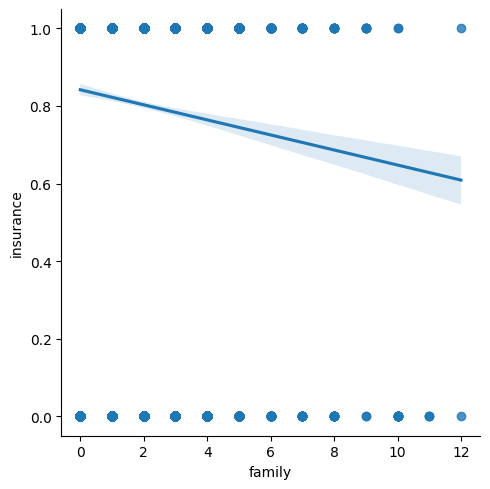

In [14]:
import seaborn as sns
#a["family"] = pd.to_numeric(a["family"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="family",y=str(target),data=a)

<Axes: xlabel='insurance', ylabel='insurance'>

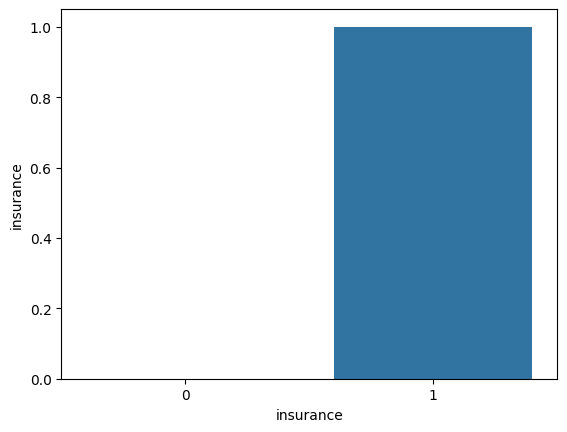

In [15]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='health', ylabel='insurance'>

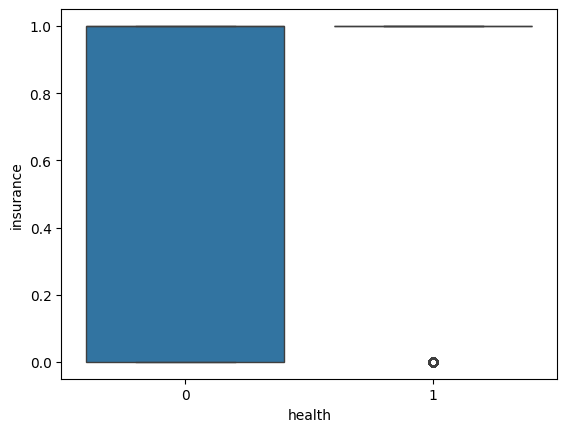

In [16]:
sns.boxplot(x=a.columns[1],y=str(target),data=a)

<ipython-input-17-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='insurance', ylabel='Density'>

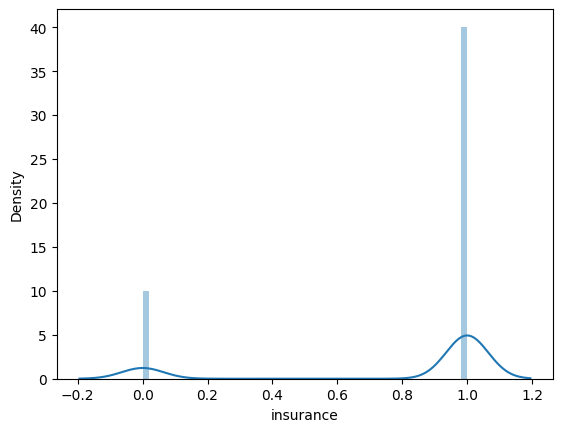

In [17]:
sns.distplot(a[str(target)])

<Axes: xlabel='health', ylabel='Density'>

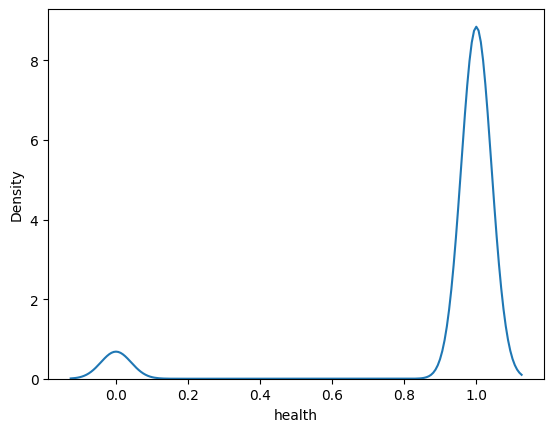

In [18]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='age', ylabel='Density'>

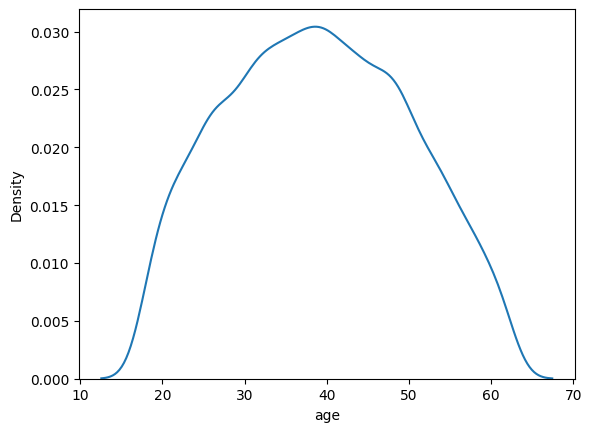

In [21]:
sns.kdeplot(a[a.columns[2]])

<Axes: xlabel='gender', ylabel='count'>

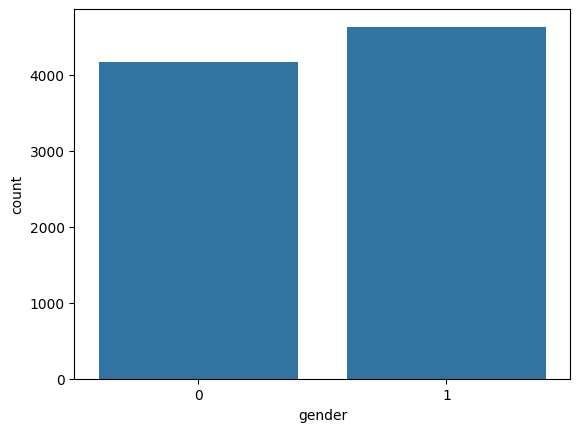

In [22]:
sns.countplot(x=a.columns[4],data=a)

<Axes: >

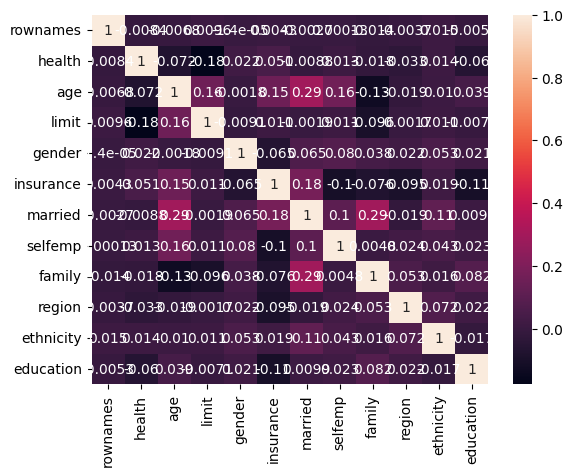

In [23]:
data=a.select_dtypes(include=np.number).corr()
sns.heatmap(data, annot=True)

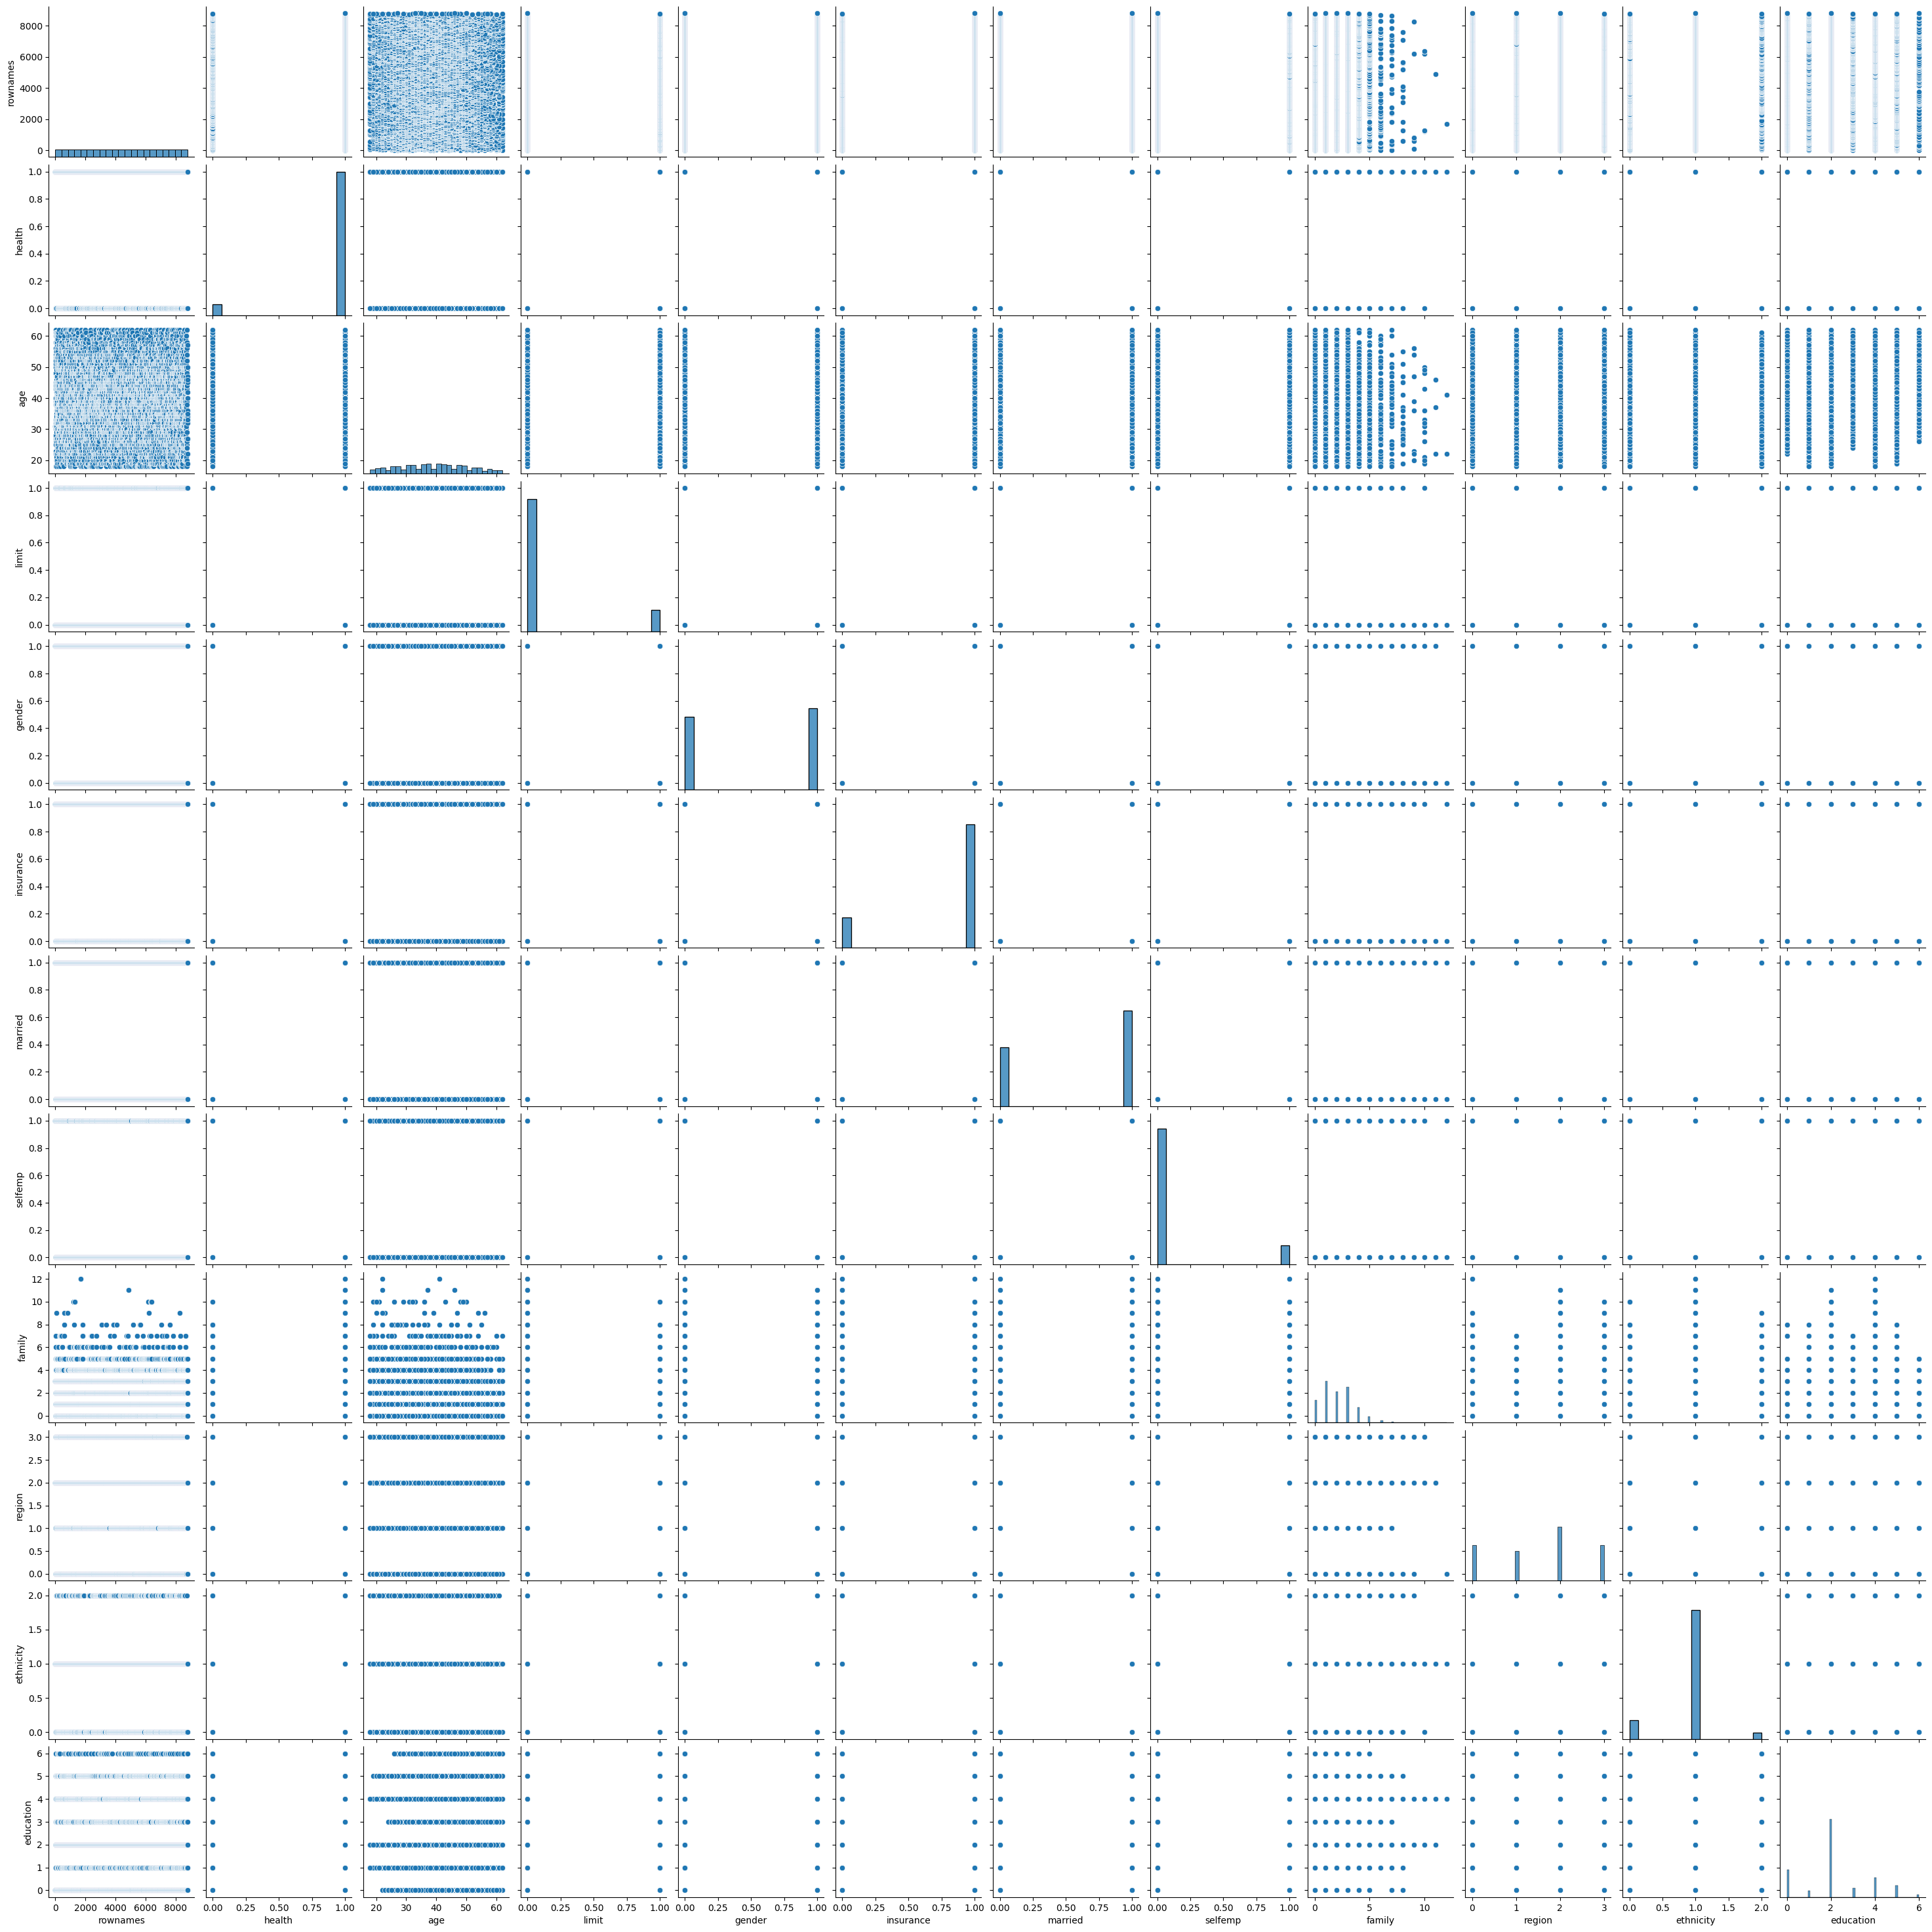

In [24]:
sns.pairplot(data=a)

In [25]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames  health  age  limit  gender  married  selfemp  family  region  \
0            1       1   31      0       1        1        1       3       2   
1            2       1   31      0       0        1        0       3       2   
2            3       1   54      0       1        1        0       4       3   
3            4       1   27      0       1        0        0       4       3   
4            5       1   39      0       1        1        0       4       3   
...        ...     ...  ...    ...     ...      ...      ...     ...     ...   
8797      8798       1   46      0       0        1        0       2       1   
8798      8799       1   50      0       1        1        0       2       1   
8799      8800       1   27      0       1        1        0       1       2   
8800      8801       1   27      0       0        1        0       1       2   
8801      8802       1   35      0       1        1        0       3       1   

      ethnicity  education  
0         

In [26]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
8797    1
8798    1
8799    1
8800    1
8801    1
Name: insurance, Length: 8802, dtype: int64


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
print(x_train)

      rownames  health  age  limit  gender  married  selfemp  family  region  \
6678      6679       1   51      1       1        1        0       1       2   
575        576       0   48      1       1        0        1       0       3   
4935      4936       1   29      0       1        1        0       3       1   
6762      6763       1   26      0       0        0        0       2       1   
1647      1648       1   53      0       0        1        0       2       3   
...        ...     ...  ...    ...     ...      ...      ...     ...     ...   
1492      1493       1   34      0       0        1        0       2       3   
6602      6603       1   36      0       0        1        0       3       2   
3671      3672       1   21      0       1        0        0       4       2   
7848      7849       1   24      0       0        0        0       3       2   
3812      3813       1   41      0       0        1        0       3       3   

      ethnicity  education  
6678      

In [29]:
print(y_train)

6678    1
575     1
4935    1
6762    1
1647    1
       ..
1492    1
6602    1
3671    1
7848    0
3812    1
Name: insurance, Length: 7041, dtype: int64


In [30]:
print(x_test)

      rownames  health  age  limit  gender  married  selfemp  family  region  \
4943      4944       0   42      0       1        1        0       3       0   
3086      3087       1   54      0       1        1        0       1       3   
3883      3884       1   18      0       1        0        0       4       0   
4541      4542       1   21      0       0        0        0       1       3   
26          27       1   51      1       1        1        0       2       3   
...        ...     ...  ...    ...     ...      ...      ...     ...     ...   
3128      3129       1   36      0       0        0        0       1       2   
1372      1373       1   49      0       0        1        0       2       1   
4343      4344       1   21      0       1        0        0       2       0   
2762      2763       1   23      0       0        0        0       4       0   
6944      6945       1   37      0       0        1        1       4       0   

      ethnicity  education  
4943      

In [31]:
print(y_test)

4943    1
3086    1
3883    0
4541    1
26      0
       ..
3128    1
1372    1
4343    0
2762    1
6944    0
Name: insurance, Length: 1761, dtype: int64


In [32]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [33]:
print(ypred)

[0.83173515 0.91868301 0.56120508 ... 0.63942031 0.69970955 0.7526034 ]


In [34]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [35]:
print(ypred)

[1. 1. 0. ... 0. 1. 1.]


In [36]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [37]:
print(ypred)

[0.98 0.96 0.39 ... 0.48 0.81 0.95]
